# Modelo de Machine Learning

In [433]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [434]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [435]:
dfml = pd.read_csv("Archivos/dfML.csv")

In [436]:
y=dfml['Precio'].round(1)
x=dfml.drop(columns=['Precio'])

Luego de importar todas las librerías, cargamos el dataframe que generamos en el readme anterior (EDA) y definimos al precio como variable independiente y a las demas variables como dependientes.

### Regresión Lineal
El primer modelo que generaremos, será de regresión lineal y lo haremos tanto para este como para los otros modelos que evaluemos con un test size del 25 de la muestras.

In [437]:
modelo = LinearRegression(fit_intercept=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
modelo.fit(X_train,y_train)

LinearRegression()

In [438]:
y_train_pred = modelo.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = modelo.predict(X_test)

In [439]:
rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 8.904846505978064
Raíz del error cuadrático medio en Test: 8.961647325655377


In [440]:

r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.11618354517943097


Luego de entrenar el modelo y predecirlo sobre el grupo de testeo, vemos que tiene un RSME DE 8.96 y un R cuadrado de 0.116.

### Decision Tree

Ahora realizaremos un segundo modelo que será una regresión mediante un arbol de decisión. Inicialmente probaremos con una profundidad de 4.

Transforma las características originales en características polinómicas utilizando la clase PolynomialFeatures.

In [441]:
modeloa = DecisionTreeRegressor(max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
modeloa.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [442]:
y_train_pred = modeloa.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = modeloa.predict(X_test)

In [443]:
rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 8.932202089135256
Raíz del error cuadrático medio en Test: 8.964719135284598


In [444]:
r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.11557754472048098


### Curva de validación para Decision Tree
Con el objetivo de mejorar el último modelo, graficaremos la curva de validación para poder determinar cual es la profundidad óptima del árbol.

In [445]:
RMSEtrain = []
RMSEtest = []

for i in range(0,18):
    i+=1
    modeloa = DecisionTreeRegressor(max_depth=i)
    modeloa.fit(X_train,y_train)
    y_train_pred = modeloa.predict(X_train)
    y_test_pred = modeloa.predict(X_test)
    RMSEtest.append((mean_squared_error(y_test, y_test_pred, squared = False)))
    RMSEtrain.append(mean_squared_error(y_train, y_train_pred, squared = False))

In [446]:
profundidades = np.arange(1,19,1)

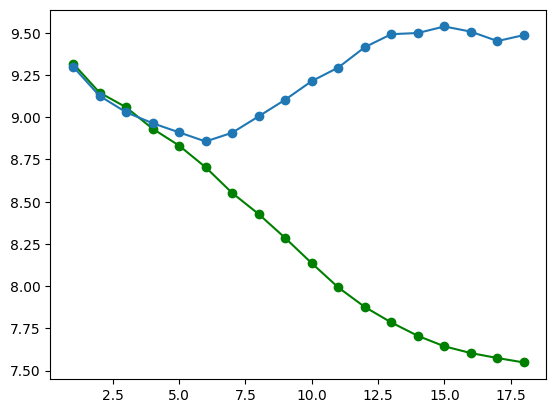

In [447]:

plt.plot(profundidades, RMSEtrain, marker='o', linestyle='-',color='g')
plt.plot(profundidades, RMSEtest, marker='o', linestyle='-')


Cómo vemos la profundidad óptima del árbol es de 6, que es donde el RMSE de testeo es el mínimo y es cercano al de entrenamiento. Una profundidad mayor implicaría overfitting y menor underfitting
A continuación volvemos a entrenar y evaluar el modelo pero con una profundidad de 6 y vemos que efectivamente mejoran las métricas RMSE y R cuadrado.

In [448]:
modeloa2 = DecisionTreeRegressor(max_depth=6)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
modeloa2.fit(X_train,y_train)
y_train_pred = modeloa2.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = modeloa2.predict(X_test)
rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)

Raíz del error cuadrático medio en Train: 8.703691378450452
Raíz del error cuadrático medio en Test: 8.856502705632256
El coeficiente de determinación del regresor es: 0.136801047525964


### Validación Cruzada
Por último realizaremos una validación cruzada para ambos modelos y así evaluar que efectivamente sea más conveniente el modelos de árbol y que no se encuentre "sesgado" por alguna aleatoriedad generada en el grupo de entrenamiento.

In [449]:
tree = modeloa2
lineal = modelo
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared = False)

In [450]:

rmse_scores_lineal = cross_validate(lineal, x, y, cv=10, scoring=make_scorer(rmse), return_train_score=True)
print("RMSE scores lineal:", rmse_scores_lineal['test_score'])
mean_rmse = np.mean(rmse_scores_lineal['test_score'])
print("Mean RMSE lineal:", mean_rmse)
rmse_scores_tree = cross_validate(tree, x, y, cv=10, scoring=make_scorer(rmse), return_train_score=True)
print("RMSE scores tree:", rmse_scores_tree['test_score'])
mean_rmse = np.mean(rmse_scores_tree['test_score'])
print("Mean RMSE tree:", mean_rmse)


RMSE scores lineal: [ 8.74205085  8.75402994  9.06450085  9.17192341 10.17579834  8.6665055
  8.35893283  9.19591794  9.06122079  8.24778835]
Mean RMSE lineal: 8.943866879013683
RMSE scores tree: [ 8.5367607   8.70583684  9.04067359  9.31757291 10.14672495  8.61667069
  8.4052797   9.37225421  8.90724474  8.19791042]
Mean RMSE tree: 8.924692875256854


Efectivamente vemos que es mejor este modelo, por lo que será el que seleccionemos para realizar las predicciones en nuestra API.

### Prototipo Función

In [488]:
dfml = pd.read_csv("Archivos/dfML.csv")
y=dfml['Precio'].round(1)
x=dfml.drop(columns=['Precio'])
Modelo_árbol = DecisionTreeRegressor(max_depth=6)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
Modelo_árbol.fit(X_train,y_train)
y_train_pred = Modelo_árbol.predict(X_train)
y_test_pred = modelo.predict(X_test)


In [489]:
rmse = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')

Raíz del error cuadrático medio en Train: 8.703691378450452


In [452]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26851 entries, 0 to 26850
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Mes                               26851 non-null  float64
 1   Género_Accounting                 26851 non-null  int64  
 2   Género_Action                     26851 non-null  int64  
 3   Género_Adventure                  26851 non-null  int64  
 4   Género_Animation &amp; Modeling   26851 non-null  int64  
 5   Género_Audio Production           26851 non-null  int64  
 6   Género_Casual                     26851 non-null  int64  
 7   Género_Design &amp; Illustration  26851 non-null  int64  
 8   Género_Early Access               26851 non-null  int64  
 9   Género_Education                  26851 non-null  int64  
 10  Género_Free to Play               26851 non-null  int64  
 11  Género_Indie                      26851 non-null  int64  
 12  Géne

In [453]:
x.head(3)

,Mes,Género_Accounting,Género_Action,Género_Adventure,Género_Animation &amp; Modeling,Género_Audio Production,Género_Casual,Género_Design &amp; Illustration,Género_Early Access,Género_Education,...,Género_RPG,Género_Racing,Género_Simulation,Género_Software Training,Género_Sports,Género_Strategy,Género_Utilities,Género_Video Production,Género_Web Publishing,Acceso_temprano_num
0,1.0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,7.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [478]:
columnas_modelo

['Género_Accounting',
 'Género_Action',
 'Género_Adventure',
 'Género_Animation &amp; Modeling',
 'Género_Audio Production',
 'Género_Casual',
 'Género_Design &amp; Illustration',
 'Género_Early Access',
 'Género_Education',
 'Género_Free to Play',
 'Género_Indie',
 'Género_Massively Multiplayer',
 'Género_Photo Editing',
 'Género_RPG',
 'Género_Racing',
 'Género_Simulation',
 'Género_Software Training',
 'Género_Sports',
 'Género_Strategy',
 'Género_Utilities',
 'Género_Video Production',
 'Género_Web Publishing']

In [480]:
columnas_modelo = x.columns.tolist()[1:23]
input_text = 'Género_Action, Género_Accounting'
columnas_usuario_lista = input_text.split(", ")
# Crea un conjunto (set) con las columnas proporcionadas por el usuario
columnas_usuario = set(columnas_usuario_lista)
# Encuentra la intersección entre las columnas del modelo y las columnas proporcionadas por el usuario
columnas_validas = columnas_usuario.intersection(columnas_modelo)
# Crea un diccionario con las columnas proporcionadas por el usuario y sus respectivos valores (1 o 0)
valores_usuario = {columna: 1 if columna in columnas_usuario else 0 for columna in columnas_modelo}
# Crea un DataFrame a partir del diccionario
df_usuario = pd.DataFrame(valores_usuario, index=[0])
# Convierte el DataFrame en una lista ordenada
lista_ordenada = df_usuario.to_numpy().tolist()[0]
lista_ordenada


[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [486]:
def predict3 (mes,input_text,acceso_temprano):
    """
    Esta función deber recibir 
        - mes:el mes con números del 1 al 12
        - input_text: los géneros separados con coma seguido de un espacio y con el prefijo Género. Por ejemplo: 'Género_Action, Género_Accounting'
        - acceso_temprano: 1 para True o 0 para False
    La función devolverá el valor predicho seguido del RMSE del modelo
    Los géneros disponibles son : ['Género_Accounting',  'Género_Action', 'Género_Adventure',  
    'Género_Animation &amp; Modeling',  'Género_Audio Production',  'Género_Casual',  'Género_Design &amp; Illustration', 
    'Género_Early Access',  'Género_Education',  'Género_Free to Play',  'Género_Indie',  'Género_Massively Multiplayer', 
    'Género_Photo Editing',  'Género_RPG',  'Género_Racing',  'Género_Simulation',  'Género_Software Training', 
    'Género_Sports',  'Género_Strategy', 'Género_Utilities',  'Género_Video Production',  'Género_Web Publishing']
    """
    columnas_modelo = x.columns.tolist()[1:23]
    columnas_usuario_lista = input_text.split(", ")
    # Crea un conjunto (set) con las columnas proporcionadas por el usuario
    columnas_usuario = set(columnas_usuario_lista)
    # Encuentra la intersección entre las columnas del modelo y las columnas proporcionadas por el usuario
    columnas_validas = columnas_usuario.intersection(columnas_modelo)
    # Crea un diccionario con las columnas proporcionadas por el usuario y sus respectivos valores (1 o 0)
    valores_usuario = {columna: 1 if columna in columnas_usuario else 0 for columna in columnas_modelo}
    # Crea un DataFrame a partir del diccionario
    df_usuario = pd.DataFrame(valores_usuario, index=[0])
    # Convierte el DataFrame en una lista ordenada
    género = df_usuario.to_numpy().tolist()[0]
    features = [mes]+género+[acceso_temprano]
    x_pred = np.array(features).reshape(1, -1)
    return Modelo_árbol.predict(x_pred),rmse

In [487]:
predict3(2,'Género_Action, Género_Accounting',0)

C:\Users\Mariano\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


(array([10.03480294]), 8.742146060112605)